In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [32]:
data = pd.read_csv('./data/salary2.csv')
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


# 분석목적: 학력, 교육연수, 혼인상태, 직업정보가 있는 연봉데이터셋을 이용한 연봉 예측
- 연봉이 5만달러 이상인지 아닌지

### 컬럼 설명
* age: 나이
* workclass: 고용형태
* education: 학력
* education-num: 교육연수
* marital-status: 혼인상태
* occupation: 직업
* relationship: 가족관계
* race: 인종
* sex: 성별
* capital-gain: 자산증가
* capital-loss: 자산감소
* hours-per-week: 주당 노동 시간
* native-country: 본국
* class: 연봉구분 - target(분석대상)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [34]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


# 결측치 탐색

In [35]:
data.isna().sum() / len(data) * 100

age               0.000000
workclass         5.730724
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.751198
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.754637
class             0.000000
dtype: float64

In [36]:
# 결측치가 있는데 제거하는 경우는 타겟변수와의 관계를 확인하고 제거해도 되는지 고려하기
data['class'].value_counts()

class
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [38]:
# workclass와 occupation의 결측치가 같이 존재하는 경우가 많음
data[(data['occupation'].isna()) & (data['workclass'].isna())]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,NaN,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K
22,72,NaN,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,NaN,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
48812,30,NaN,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,NaN,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
48822,41,NaN,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [42]:
# 다시 찾아서 확인하기
data['class'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [40]:
265 / 11682 * 100

2.268447183701421

In [41]:
data.isna().sum()

age                  0
workclass         2799
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

# 결측값의 비율이 약 7.5%이고, 삭제 시 데이터 분포에 편향을 주지 않으므로 삭제 

In [29]:
data = data.dropna()
data = data.reset_index(drop=True)
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
45218,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
45219,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
45220,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [45]:
# class를 숫자로 변환
data['class'] = data['class'].apply(lambda x: 1 if x == ' >50K' else 0)
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0


# 이상치 탐색
- 이상값이 없음

In [46]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,class
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382,0.239282
std,13.710510,2.570973,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [47]:
data['capital-gain'].value_counts()

capital-gain
0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
6612         1
1111         1
22040        1
1639         1
2387         1
Name: count, Length: 123, dtype: int64

<Axes: ylabel='Frequency'>

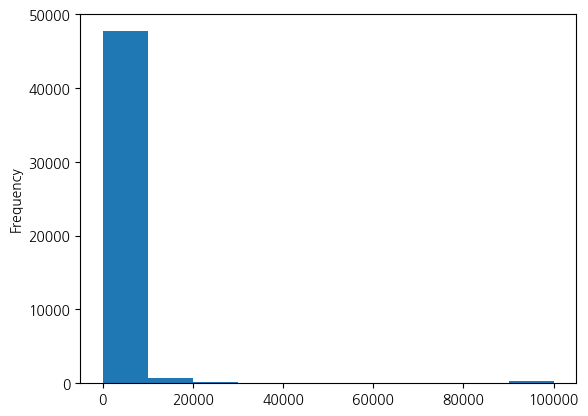

In [49]:
# 사분위수가 모두 0이 나온다
data['capital-gain'].plot(kind='hist')

# EDA

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [53]:
obj_cols = data.select_dtypes(include='object')
num_cols = data.select_dtypes(exclude='object')

In [98]:
# 40% 이상인 경우는 영향을 준다고 생각하고 고려

important_cols = []
for col in obj_cols:
    print('='*30, col, '='*30)
    print(f"{col}의 unique 값 : {obj_cols[col].nunique()}")
    print()
    
    print(obj_cols[col].value_counts())
    print()
    
    print(data[[col, 'class']].groupby(col).mean().sort_values(by='class', ascending=False))
    ratio_result = data[[col, 'class']].groupby(col).mean().sort_values(by='class', ascending=False)
    important_cols.append(ratio_result[ratio_result['class'] > 0.4].index)
    print()

============================== workclass ==============================
workclass의 unique 값 : 8

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

                     class
workclass                 
Self-emp-inc      0.553392
Federal-gov       0.391760
Local-gov         0.295599
Self-emp-not-inc  0.278871
State-gov         0.267542
Private           0.217867
Without-pay       0.095238
Never-worked      0.000000

============================== education ==============================
education의 unique 값 : 16

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate      

In [74]:
ratio_result = data[['education', 'class']].groupby('education').mean().sort_values(by='class', ascending=False)
ratio_result[ratio_result['class'] > 0.4].index

Index([' Prof-school', ' Doctorate', ' Masters', ' Bachelors'], dtype='object', name='education')

In [85]:
important_cols

[Index([' Self-emp-inc'], dtype='object', name='workclass'),
 Index([' Prof-school', ' Doctorate', ' Masters', ' Bachelors'], dtype='object', name='education'),
 Index([' Married-civ-spouse'], dtype='object', name='marital-status'),
 Index([' Exec-managerial', ' Prof-specialty'], dtype='object', name='occupation'),
 Index([' Wife', ' Husband'], dtype='object', name='relationship'),
 Index([], dtype='object', name='race'),
 Index([], dtype='object', name='sex'),
 Index([' France', ' India'], dtype='object', name='native-country')]

In [99]:
final_cols = []
for col in important_cols:
    # 중요 컬럼이 1개 이상인 경우 확인
    if len(col) > 0:
        print(col.name, len(col))
        final_cols.append(col.name)
final_cols

workclass 1
education 4
marital-status 1
occupation 2
relationship 2
native-country 2


['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'native-country']

# 수치형 변수들 EDA

In [91]:
num_cols.iloc[:, :-1]

,age,education-num,capital-gain,capital-loss,hours-per-week
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
4,18,10,0,0,30
...,...,...,...,...,...
48837,27,12,0,0,38
48838,40,9,0,0,40
48839,58,9,0,0,40
48840,22,9,0,0,20


============================== age ==============================
age의 기초 통계값 : count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64



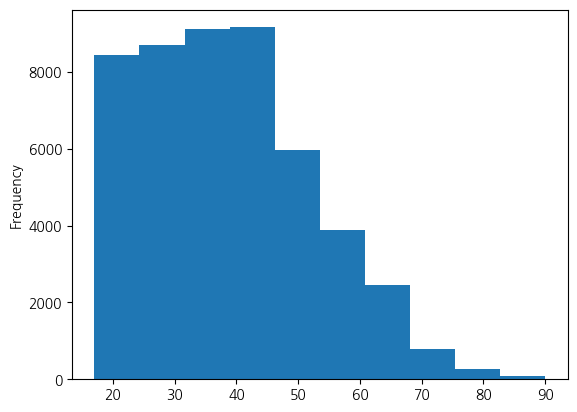


        class
age          
50   0.430716
53   0.405063
46   0.400182
51   0.399088
47   0.396855
..        ...
18   0.000000
82   0.000000
86   0.000000
87   0.000000
89   0.000000

[74 rows x 1 columns]

============================== education-num ==============================
education-num의 기초 통계값 : count    48842.000000
mean        10.078089
std          2.570973
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64



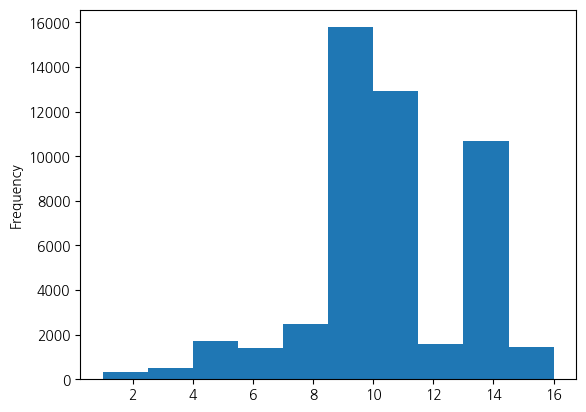


                  class
education-num          
15             0.739808
16             0.725589
14             0.549116
13             0.412835
12             0.257964
11             0.253275
10             0.189649
9              0.158578
8              0.073059
4              0.064921
6              0.062635
5              0.054233
3              0.053045
7              0.050773
2              0.032389
1              0.012048

============================== capital-gain ==============================
capital-gain의 기초 통계값 : count    48842.000000
mean      1079.067626
std       7452.019058
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64



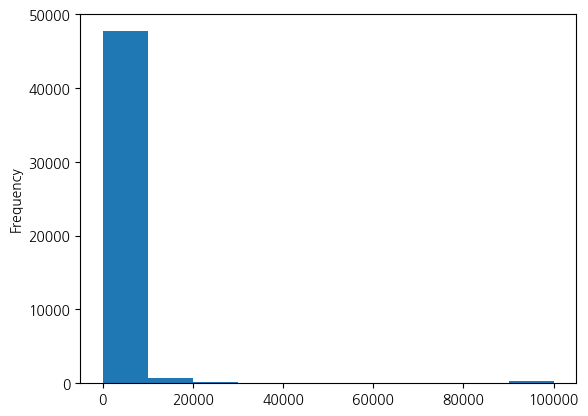


              class
capital-gain       
10520           1.0
7430            1.0
9386            1.0
10605           1.0
15831           1.0
...             ...
7443            0.0
6849            0.0
22040           0.0
34095           0.0
41310           0.0

[123 rows x 1 columns]

============================== capital-loss ==============================
capital-loss의 기초 통계값 : count    48842.000000
mean        87.502314
std        403.004552
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64



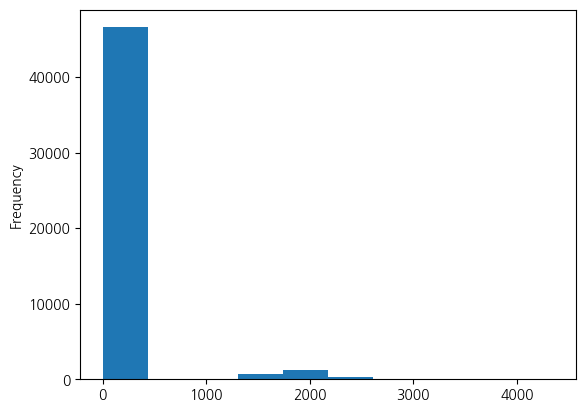


              class
capital-loss       
1564            1.0
1887            1.0
1755            1.0
2201            1.0
2231            1.0
...             ...
2754            0.0
3175            0.0
3770            0.0
3900            0.0
4356            0.0

[99 rows x 1 columns]

============================== hours-per-week ==============================
hours-per-week의 기초 통계값 : count    48842.000000
mean        40.422382
std         12.391444
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64



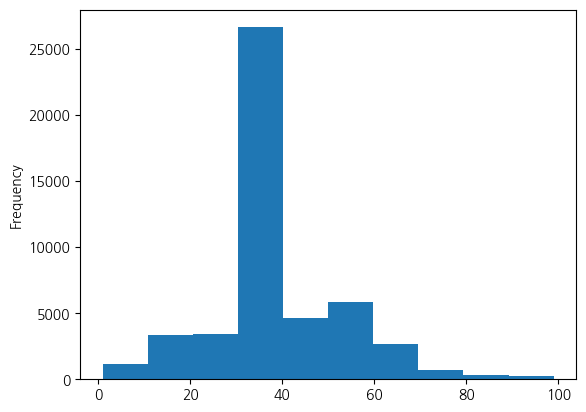


                   class
hours-per-week          
69              1.000000
61              0.750000
76              0.750000
74              0.666667
89              0.666667
...                  ...
82              0.000000
87              0.000000
88              0.000000
94              0.000000
91              0.000000

[96 rows x 1 columns]



In [100]:
# 40% 이상인 경우는 영향을 준다고 생각하고 고려

for col in num_cols.iloc[:, :-1]:
    print('='*30, col, '='*30)
    print(f"{col}의 기초 통계값 : {num_cols[col].describe()}")
    print()
    
    num_cols[col].plot(kind='hist')
    plt.show()
    print()
    
    print(data[[col, 'class']].groupby(col).mean().sort_values(by='class', ascending=False))
    ratio_result = data[[col, 'class']].groupby(col).mean().sort_values(by='class', ascending=False)
    important_cols.append(ratio_result[ratio_result['class'] > 0.4].index)
    print()

In [94]:
important_cols

[Index([50, 53, 46], dtype='int64', name='age'),
 Index([15, 16, 14, 13], dtype='int64', name='education-num'),
 Index([10520,  7430,  9386, 10605, 15831, 15024, 15020, 14344, 14084, 13550,
        11678, 20051, 25124, 25236, 27828, 99999, 18481,  8614,  5556,  4787,
         4934,  5178,  6612,  6418,  6514,  6097,  4687,  9562,  7688,  7262,
         7298,  3103,  4386,  7896],
       dtype='int64', name='capital-gain'),
 Index([1564, 1887, 1755, 2201, 2231, 2246, 2282, 2392, 2415, 2444, 2472, 2824,
        1911, 2174, 1977, 1825, 2559, 2547, 3004, 1848, 1902, 1485, 2377, 3683,
         653, 2258],
       dtype='int64', name='capital-loss'),
 Index([69, 61, 76, 74, 89, 67, 86, 73, 95, 97, 55, 50, 60, 59, 57, 65, 90], dtype='int64', name='hours-per-week')]

In [101]:
final_cols = []
for col in important_cols:
    # 중요 컬럼이 1개 이상인 경우 확인
    if len(col) > 0:
        print(col.name, len(col))
        final_cols.append(col.name)
final_cols

workclass 1
education 4
marital-status 1
occupation 2
relationship 2
native-country 2
age 3
education-num 4
capital-gain 34
capital-loss 26
hours-per-week 17


['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'native-country',
 'age',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [106]:
data['education'].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [105]:
data['education-num'].value_counts()

education-num
9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: count, dtype: int64

In [108]:
data_set1 = data[final_cols]
data_set1 = data_set1.drop('education', axis=1)
data_set1

,workclass,marital-status,occupation,relationship,native-country,age,education-num,capital-gain,capital-loss,hours-per-week
0,Private,Never-married,Machine-op-inspct,Own-child,United-States,25,7,0,0,40
1,Private,Married-civ-spouse,Farming-fishing,Husband,United-States,38,9,0,0,50
2,Local-gov,Married-civ-spouse,Protective-serv,Husband,United-States,28,12,0,0,40
3,Private,Married-civ-spouse,Machine-op-inspct,Husband,United-States,44,10,7688,0,40
4,NaN,Never-married,NaN,Own-child,United-States,18,10,0,0,30
...,...,...,...,...,...,...,...,...,...,...
48837,Private,Married-civ-spouse,Tech-support,Wife,United-States,27,12,0,0,38
48838,Private,Married-civ-spouse,Machine-op-inspct,Husband,United-States,40,9,0,0,40
48839,Private,Widowed,Adm-clerical,Unmarried,United-States,58,9,0,0,40
48840,Private,Never-married,Adm-clerical,Own-child,United-States,22,9,0,0,20


In [114]:
X = pd.get_dummies(data_set1, drop_first=True)
X.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,25,7,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,9,0,0,50,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,12,0,0,40,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,10,7688,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,10,0,0,30,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [113]:
y = data['class']
y

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: class, Length: 48842, dtype: int64

In [115]:
from sklearn.model_selection import train_test_split


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,stratify=y,random_state=10)

In [130]:
# 1인 경우는 많이 학습하지 못함
y_train.value_counts()

class
0    22293
1     7012
Name: count, dtype: int64

In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [132]:
dtc = DecisionTreeClassifier(random_state=10)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)

print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8218252546450325
              precision    recall  f1-score   support

           0       0.88      0.89      0.88     14862
           1       0.63      0.61      0.62      4675

    accuracy                           0.82     19537
   macro avg       0.76      0.75      0.75     19537
weighted avg       0.82      0.82      0.82     19537



# 모델 성능  튜닝(하이퍼파라미터 튜닝)

In [136]:
for i in range(1,15):
    dtc = DecisionTreeClassifier(random_state=10)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    
    print('='*30, f"Max_depth = {i}", '='*30)
    print(accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))
    print()

============================== Max_depth = 1 ==============================
0.8218252546450325
              precision    recall  f1-score   support

           0       0.88      0.89      0.88     14862
           1       0.63      0.61      0.62      4675

    accuracy                           0.82     19537
   macro avg       0.76      0.75      0.75     19537
weighted avg       0.82      0.82      0.82     19537


============================== Max_depth = 2 ==============================
0.8218252546450325
              precision    recall  f1-score   support

           0       0.88      0.89      0.88     14862
           1       0.63      0.61      0.62      4675

    accuracy                           0.82     19537
   macro avg       0.76      0.75      0.75     19537
weighted avg       0.82      0.82      0.82     19537


============================== Max_depth = 3 ==============================
0.8218252546450325
              precision    recall  f1-score   support

    

In [134]:
from sklearn.tree import plot_tree

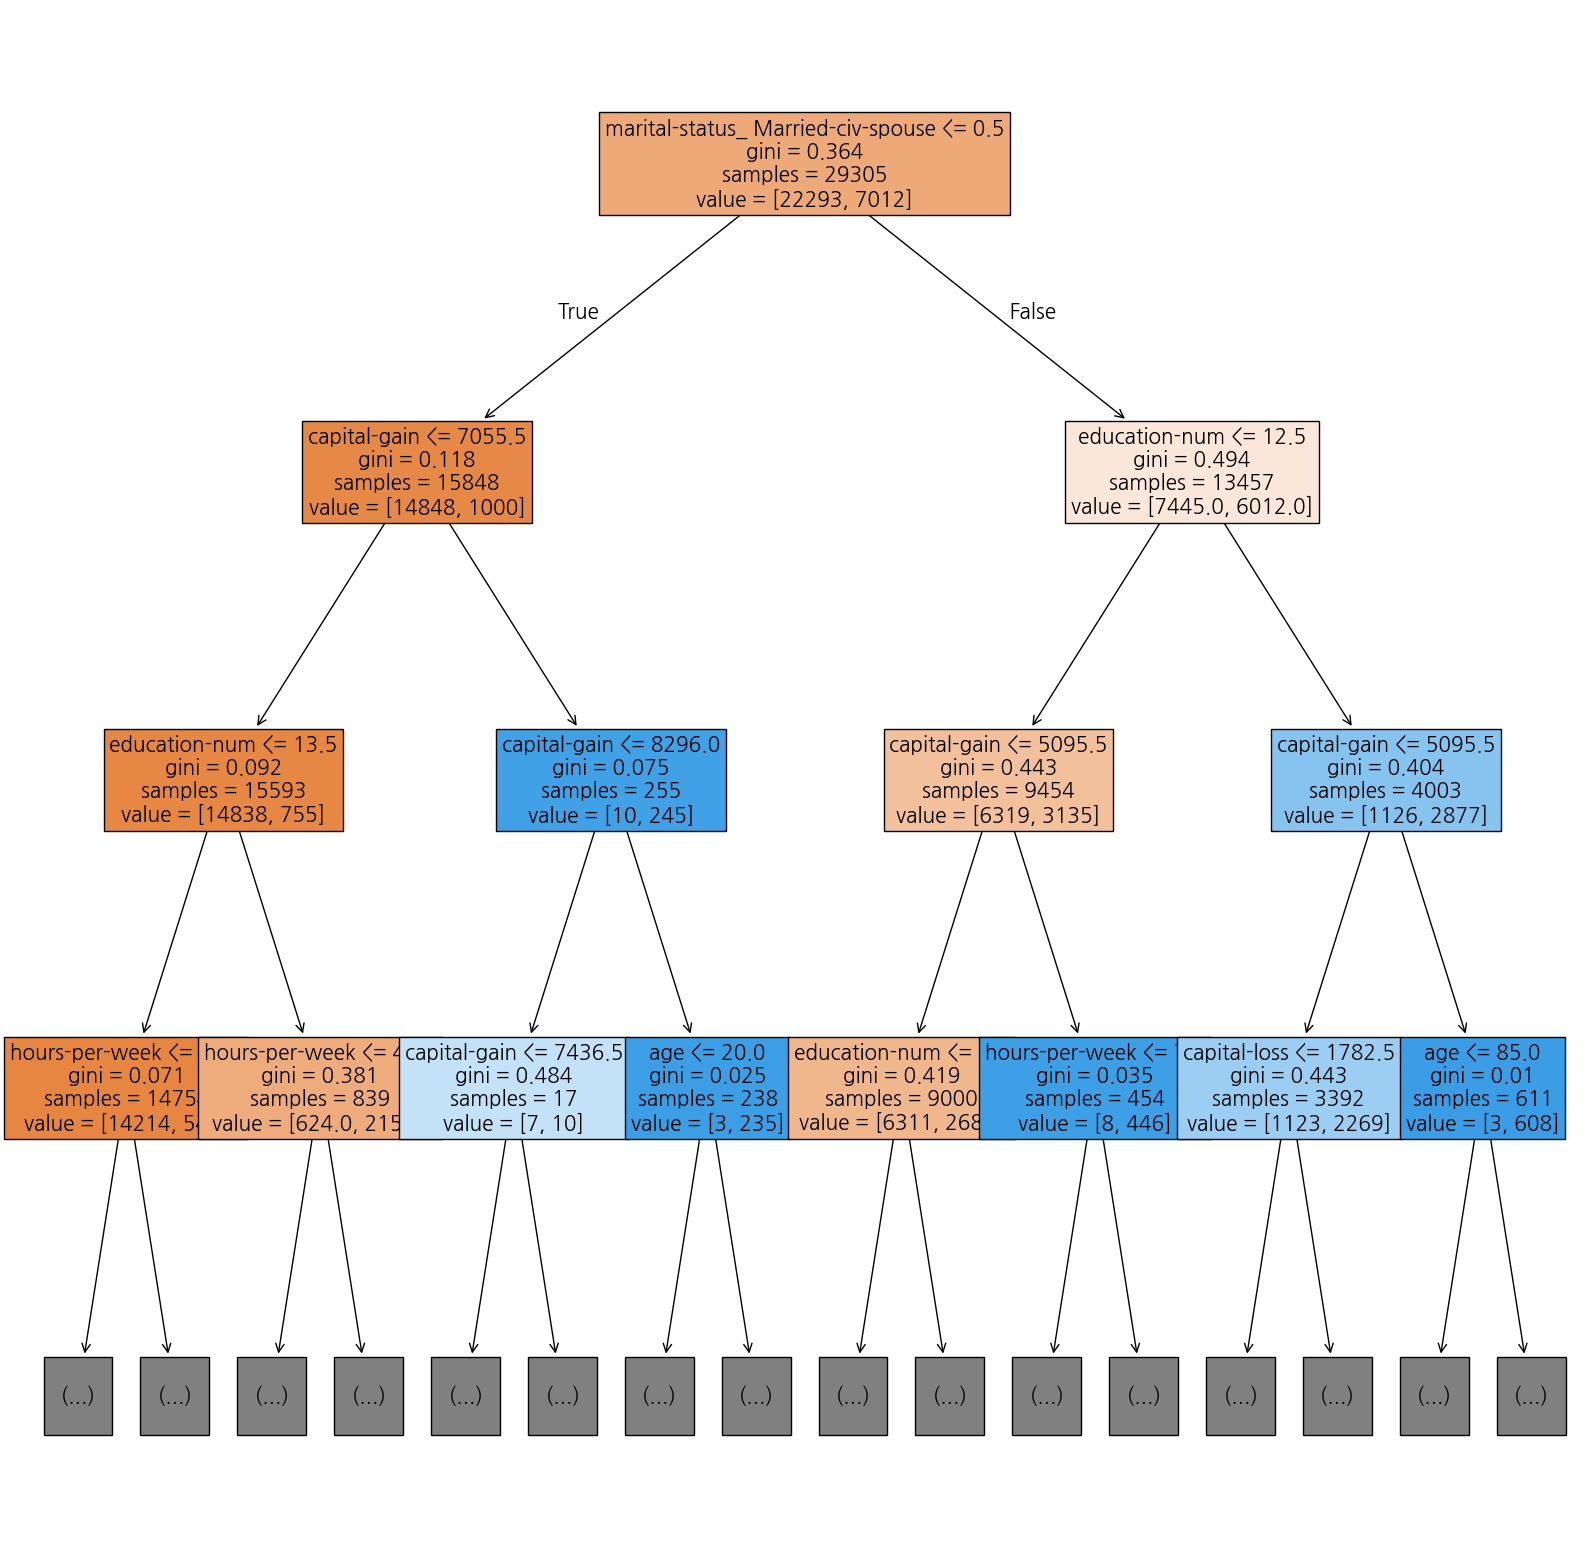

In [138]:
plt.figure(figsize=(20,20))
plot_tree(dtc, feature_names=dtc.feature_names_in_, max_depth=3,fontsize=15, filled=True)
plt.show()